In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! kaggle competitions download -c tabular-playground-series-aug-2022

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/2.27M [00:00<?, ?B/s]
100% 2.27M/2.27M [00:00<00:00, 171MB/s]


In [ ]:
from zipfile import ZipFile as unzipper
unzipped = unzipper('/content/tabular-playground-series-aug-2022.zip')
unzipped.extractall()

In [ ]:
traindf=pd.read_csv("/content/train.csv")

In [ ]:
traindf.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [ ]:
testdf=pd.read_csv("/content/test.csv")

In [ ]:
traindf.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [ ]:
#More than 75% of products have passed
#attr 2 and attr 3 --- 75% is of type 8

In [ ]:
traindf.describe(include='O')

,product_code,attribute_0,attribute_1
count,26570,26570,26570
unique,5,2,3
top,C,material_7,material_8
freq,5765,21320,10865


In [ ]:
#attribute_0--material_7 80%
# attribute_1--material_8 40%

In [ ]:
traindf['attribute_0'].unique()

array(['material_7', 'material_5'], dtype=object)

In [ ]:
traindf['attribute_1'].unique()

array(['material_8', 'material_5', 'material_6'], dtype=object)

In [ ]:
traindf['attribute_3'].unique()

array([5, 8, 6, 9])

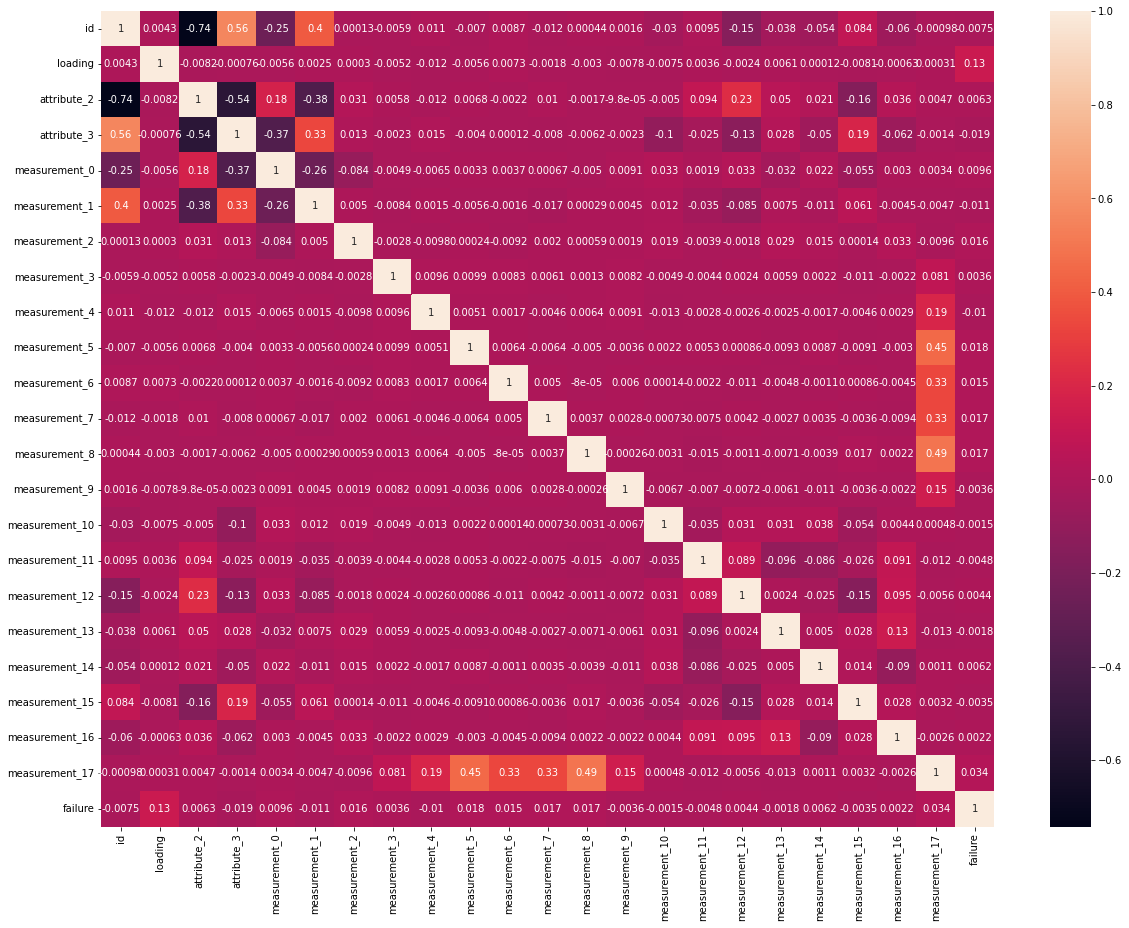

In [ ]:
dfcorr=traindf.corr()
plt.figure(figsize=(20,15))
sns.heatmap(dfcorr, annot=True)

In [ ]:
#attr 2 and 3 have a neg corr with each other

In [ ]:
#Combining testdf and traindf

cdf=pd.concat([traindf.assign(ind='train'), testdf.assign(ind='test')])

In [ ]:
print(traindf.shape, testdf.shape, cdf.shape)


(26570, 26) (20775, 25) (47345, 27)


**DATA CLEANING:** 

In [ ]:
#Filling null values

print(cdf.isna().sum())

id                    0
product_code          0
loading             473
attribute_0           0
attribute_1           0
attribute_2           0
attribute_3           0
measurement_0         0
measurement_1         0
measurement_2         0
measurement_3       710
measurement_4       947
measurement_5      1184
measurement_6      1420
measurement_7      1657
measurement_8      1894
measurement_9      2131
measurement_10     2367
measurement_11     2604
measurement_12     2841
measurement_13     3077
measurement_14     3314
measurement_15     3551
measurement_16     3788
measurement_17     4024
failure           20775
ind                   0
dtype: int64


**FILLING NA WITH KNNIMPUTER:**

In [ ]:
cdfc=cdf.copy()

cdfc=cdfc.drop('failure', axis='columns')
numcdf=cdf.select_dtypes(np.number)

from sklearn.impute import KNNImputer

imp=KNNImputer()

imp.fit(numcdf)

cdfcpreds=imp.transform(numcdf)

In [ ]:
numcdf=pd.DataFrame(cdfcpreds, columns=list(numcdf))

In [ ]:
for col in list(numcdf):
  cdfc[col]=numcdf[col]

In [ ]:
cdfc.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
ind               0
failure           0
dtype: int64

In [ ]:
cdfc['id']=cdfc['id'].astype(int)
cdfc['failure']=cdfc['failure'].astype(int)

In [ ]:
cdfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47345 entries, 0 to 20774
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              47345 non-null  int64  
 1   product_code    47345 non-null  object 
 2   loading         47345 non-null  float64
 3   attribute_0     47345 non-null  object 
 4   attribute_1     47345 non-null  object 
 5   attribute_2     47345 non-null  float64
 6   attribute_3     47345 non-null  float64
 7   measurement_0   47345 non-null  float64
 8   measurement_1   47345 non-null  float64
 9   measurement_2   47345 non-null  float64
 10  measurement_3   47345 non-null  float64
 11  measurement_4   47345 non-null  float64
 12  measurement_5   47345 non-null  float64
 13  measurement_6   47345 non-null  float64
 14  measurement_7   47345 non-null  float64
 15  measurement_8   47345 non-null  float64
 16  measurement_9   47345 non-null  float64
 17  measurement_10  47345 non-null 

In [ ]:
plotdf=cdfc.drop(['id','product_code','ind'], axis=1)

**VISUALIZATIONS:**
wrt to 'failure'

In [ ]:
from sklearn import preprocessing

for col in plotdf.select_dtypes(include="object"):

  le = preprocessing.LabelEncoder()
  le.fit(plotdf[col])
  plotdf[col]=le.transform(plotdf[col])

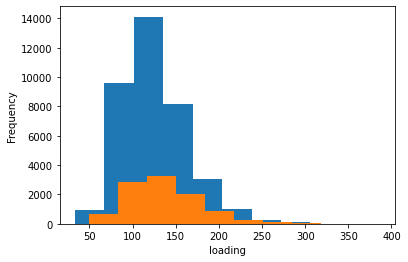

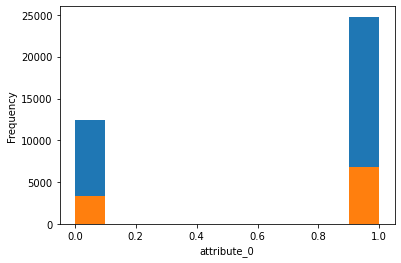

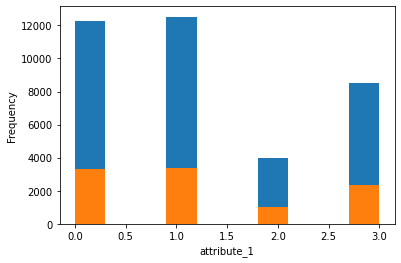

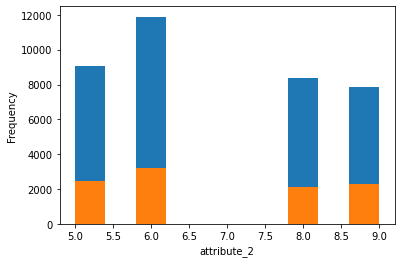

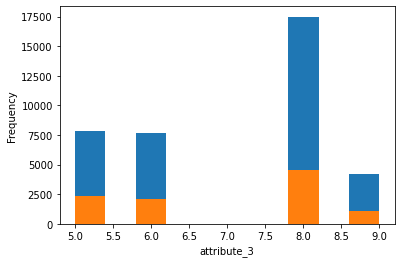

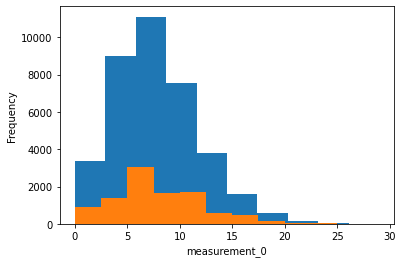

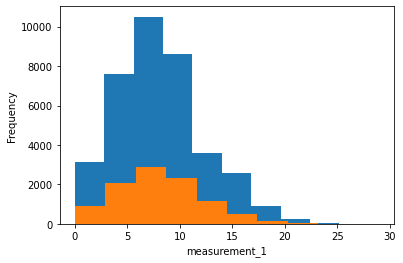

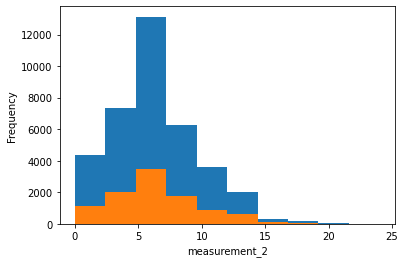

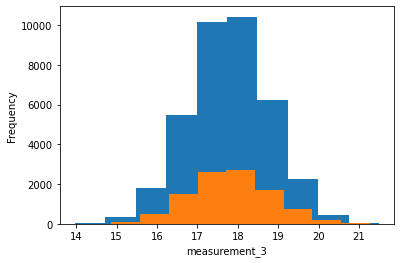

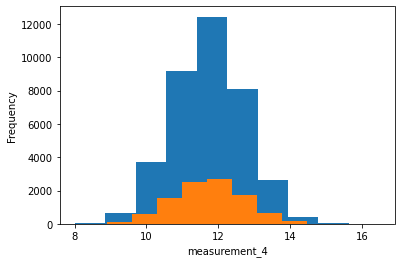

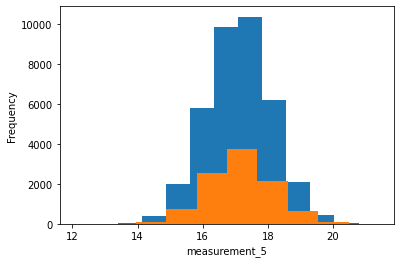

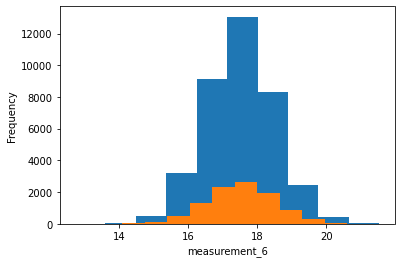

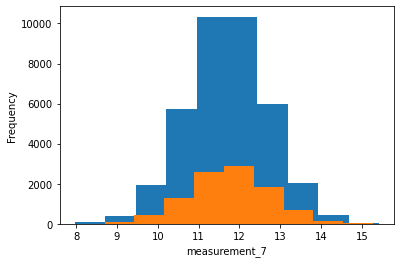

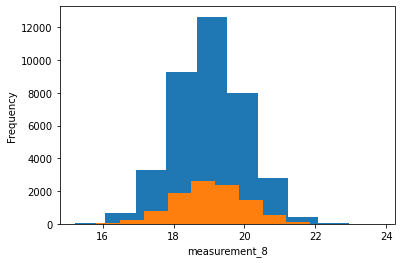

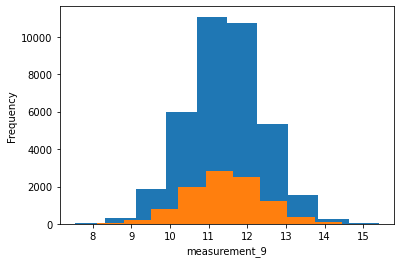

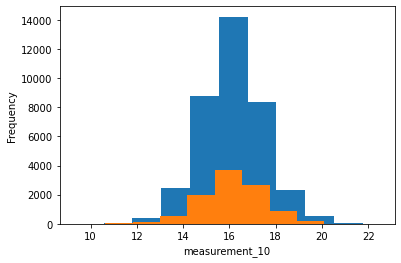

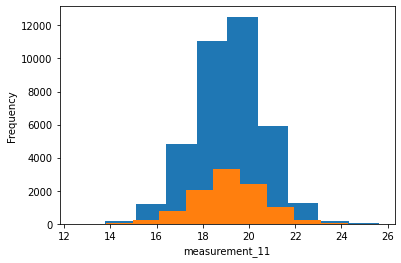

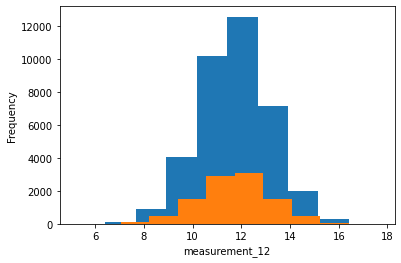

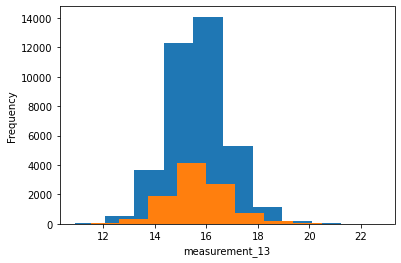

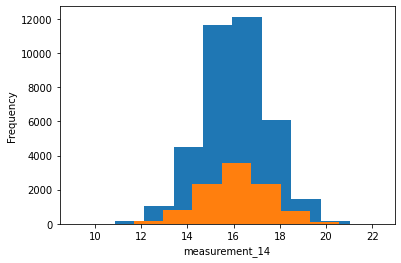

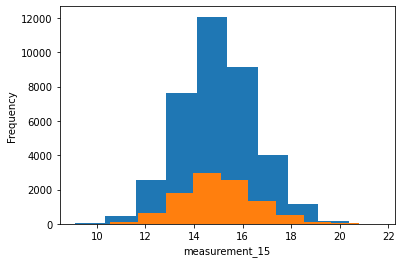

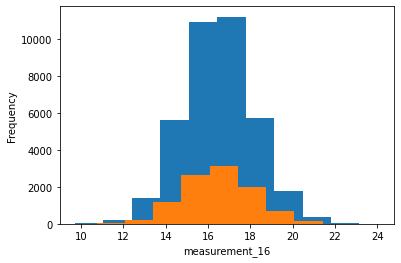

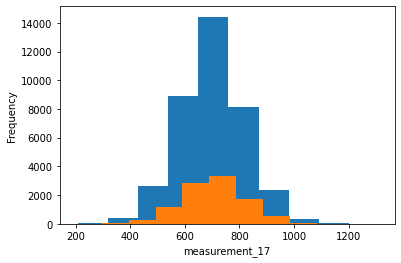

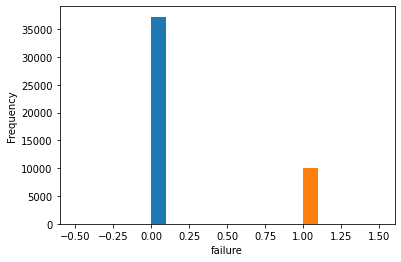

In [ ]:
for col in list(plotdf):
  plt.figure()
  plotdf[plotdf['failure'] == 0][col].plot.hist()
  plotdf[plotdf['failure'] == 1][col].plot.hist()
  plt.xlabel(col)
  plt.show()

**ENCODING:**

with dummies

In [ ]:
ind=cdfc['ind']
cdfc=cdfc.drop(['ind'], axis=1)
fcdf=pd.get_dummies(cdfc)

**SCALING:**

In [ ]:
from sklearn.preprocessing import StandardScaler

fcdf=fcdf.drop(['id','failure'], axis=1)
ss=StandardScaler()
ss.fit(fcdf)
fcdf=pd.DataFrame(ss.transform(fcdf), index=fcdf.index, columns=fcdf.columns)

In [64]:
fcdf['id']=cdfc['id']
fcdf['ind']=ind

In [70]:
fcdf.to_csv('preprocessed.csv')